<a href="https://colab.research.google.com/github/Hyprnx/Machine_Learning_2/blob/main/W5/W5_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dùng Numpy implement thuật toán dbscan, test thử với dữ liệu.

Ý nghĩa tham số radius, min sample trong thuật toán dbscan? Nếu chỉ số lớn, nhỏ ảnh hưởng thế nào tới thuật toán?

Biến đổi lại và so sánh ba thuật toán: kmean, GMM, dbscan. Khi nào nên sử dụng thuật toán nào? cho ví dụ?

ý nghĩa của radius là bán kính từ 1 điểm, bất cứ điểm nào nằm trong đường tròn có tâm là điểm dữ liệu, bán kính là radius sẽ được tính là hàng xóm của điểm dữ liệu đó, nếu nằm ngoài thì sẽ không phải là hàng xóm. Nếu điều chỉnh r lớn hơn, thì bán kinh cũng sẽ lớn hơn, nhiều dữ liệu sẽ được tính vào 1 cluster hơn, tuy nhiên cũng sẽ có nhiều nhiễu trong cluster đó hơn. Nếu chỉnh radius thấp đi, thì sẽ có ít hàng xóm hơn, cluster có thể bị miss mất dữ liệu đáng ra nên nằm trong cluster. min_pts là số điểm để được tính là 1 core point, nếu 1 điểm có số hàng xóm lớn hơn min_pts, điểm đó sẽ được coi là 1 điểm core. Nếu chỉnh min_pts thấp đi, thì sẽ có nhiều core point hơn vì điều kiện để làm core point dễ hơn trước, chính vì dễ làm core point nên cluster sẽ nhiễu hơn. Nếu tăng min_pts, sẽ khó hơn để trở thành 1 core point, nhiều điểm sẽ bị coi là noise hơn, cluster size sẽ bé đi và có thể không bao quát được cluster thật.

In [51]:
import sklearn
import pandas as pd
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [52]:
data, label = datasets.make_moons(n_samples = 1000,  noise = 0.05)

In [53]:
data.shape[0]

1000

In [54]:
label.shape

(1000,)

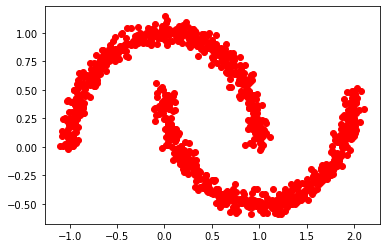

In [55]:
fig, ax = plt.subplots()
plt.scatter(data[:,0], data[:,1], c='red')
fig.show()

In [56]:
UNCLASSIFIED = False
NOISE = None

In [57]:
class DBSCAN:
    def __init__(self, data, eps, min_pts):
        self.data = data
        self.eps = eps
        self.min_pts = min_pts

    def growCluster(self, D, labels, P, NeighborPts, C):
        labels[P] = C
        i = 0
        while i < len(NeighborPts):          
            Pn = NeighborPts[i]
            if labels[Pn] == -1:
                labels[Pn] = C
            elif labels[Pn] == 0:
                labels[Pn] = C
                PnNeighborPts = self.regionQuery(Pn)
                if len(PnNeighborPts) >= self.min_pts:
                    NeighborPts = NeighborPts + PnNeighborPts
            i += 1        


    def regionQuery(self, P):
        neighbors = []
        for Pn in range(0, len(self.data)):
            if np.linalg.norm(self.data[P] - self.data[Pn]) < self.eps:
                neighbors.append(Pn)
        return neighbors


    def fit(self):
        labels = [0]*len(self.data)
        C = 0
    
        for P in range(0, len(self.data)):
            if not (labels[P] == 0):
                continue
            NeighborPts = self.regionQuery(P)
            if len(NeighborPts) < self.min_pts:
                labels[P] = -1
            else: 
                C += 1
                self.growCluster(self.data, labels, P, NeighborPts, C)
        return np.array(labels)

In [58]:
eps = 0.1
nei = 4
scanner = DBSCAN(data, eps = eps, min_pts = nei)

In [59]:
dbscan_label = scanner.fit()

In [60]:
dbscan_label.shape

(1000,)

In [61]:
df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=dbscan_label))
df

,x,y,label
0,-0.432278,0.882076,1
1,0.093733,0.444727,2
2,-1.068803,0.245790,1
3,0.817924,0.625475,1
4,1.667602,-0.231377,2
...,...,...,...
995,-0.453499,0.986961,1
996,1.972119,0.355895,2
997,0.527685,-0.294292,2
998,0.787270,0.583704,1


In [62]:
red = df[df.label == 1]

In [63]:
red

,x,y,label
0,-0.432278,0.882076,1
2,-1.068803,0.245790,1
3,0.817924,0.625475,1
6,0.608739,0.825015,1
7,0.049524,1.037903,1
...,...,...,...
992,-1.013413,0.226423,1
994,-0.397894,0.902545,1
995,-0.453499,0.986961,1
998,0.787270,0.583704,1


In [64]:
blue = df[df.label == 2]

In [65]:
blue

,x,y,label
1,0.093733,0.444727,2
4,1.667602,-0.231377,2
5,1.215126,-0.525946,2
12,0.395789,-0.350551,2
14,1.379391,-0.501068,2
...,...,...,...
989,2.029074,0.425907,2
990,1.303198,-0.474743,2
993,1.863559,0.155541,2
996,1.972119,0.355895,2


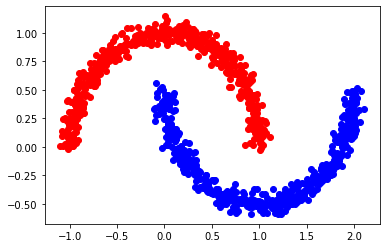

In [66]:
fig, ax = plt.subplots()
plt.scatter(red.x, red.y, c='red')
plt.scatter(blue.x, blue.y, c='blue')
fig.show()